Importing the Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Importing the dataset:

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Preprocessing the data:

In [3]:
label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


EDA:

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

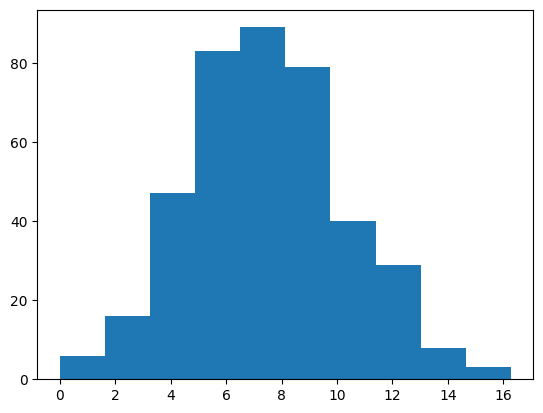

In [4]:
plt.hist(data.Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0af14b79d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0af14b7df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0af14b7730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0af14f0370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0af14f0610>],
 'means': []}

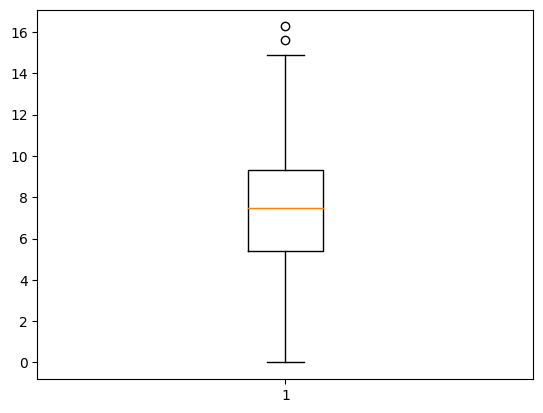

In [5]:
plt.boxplot(data.Sales)

In [6]:
data.Sales.median()

7.49

All the values in the Sales column above the median value can be considered as High Sales otherwise they will be considered as low sales:

In [7]:
for i in range(len(data.Sales)):
    if data.Sales[i] < data.Sales.median():
        data.Sales[i] = 0
    else:
        data.Sales[i] = 1

<ipython-input-7-5ff6681687d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sales[i] = 1
<ipython-input-7-5ff6681687d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sales[i] = 1
<ipython-input-7-5ff6681687d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sales[i] = 1
<ipython-input-7-5ff6681687d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [8]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,1,65,10,1,1
2,1.0,113,35,10,269,80,2,59,12,1,1
3,0.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1,33,14,1,1
396,1.0,139,23,3,37,120,2,55,11,0,1
397,1.0,162,26,12,368,159,2,40,18,1,1
398,1.0,100,79,7,284,95,0,50,12,1,1


In [9]:
# Just checking if there are any errors in the above logic.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,0.8475,0.359955,0.0,1.00,1.0,1.0,1.0
CompPrice,400.0,124.9750,15.334512,77.0,115.00,125.0,135.0,175.0
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0
Advertising,400.0,6.6350,6.650364,0.0,0.00,5.0,12.0,29.0
Population,400.0,264.8400,147.376436,10.0,139.00,272.0,398.5,509.0
Price,400.0,115.7950,23.676664,24.0,100.00,117.0,131.0,191.0
ShelveLoc,400.0,1.3075,0.833475,0.0,1.00,2.0,2.0,2.0
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0
Education,400.0,13.9000,2.620528,10.0,12.00,14.0,16.0,18.0
Urban,400.0,0.7050,0.456614,0.0,0.00,1.0,1.0,1.0


In [10]:
x=data.iloc[:,1:]
y=data['Sales']

In [11]:
data.Sales.value_counts()

1.0    339
0.0     61
Name: Sales, dtype: int64

Splitting the data:

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

Building the Random Forest model using Entropy criteria

In [13]:
def best_tree(x_train, y_train, x_test, y_test):
    tree_score = {}
    for tree in range(1,20):
        model = RandomForestClassifier(n_jobs=3,n_estimators=tree,criterion = 'entropy')
        model.fit(x_train,y_train)
        tree_score[tree] = round(model.score(x_test, y_test)*100,2)
    maximum_score = max(tree_score.values())
    for key in tree_score.keys():
        if tree_score[key] == maximum_score:
            best_key = key
            print(f"the optimum number of trees is: {key} with the score of {maximum_score}")
            break
    model = RandomForestClassifier(n_jobs=3,n_estimators=best_key,criterion = 'entropy')
    model.fit(x_train,y_train)
    print(f"Accuracy: {round(model.score(x_test, y_test)*100,2)}%")
    return model

In [14]:
model = best_tree(x_train, y_train, x_test, y_test)

the optimum number of trees is: 3 with the score of 82.5
Accuracy: 72.5%


Checking the accuracy of the model:

In [15]:
print(f"Accuracy: {round(model.score(x_test, y_test)*100,2)}%")

Accuracy: 72.5%


In [16]:
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1.0    70
0.0    10
dtype: int64

In [17]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
Sales,,
0.0,4,16
1.0,6,54


In [18]:
print(f"Accuracy: {round(np.mean(preds==y_test)*100, 2)}%")

Accuracy: 72.5%


Best Features found using Entropy method:

In [19]:
fn = list(x.columns)
feature_imp = pd.Series(model.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp

Price          0.167098
Income         0.164718
Population     0.149507
Age            0.134630
CompPrice      0.121951
Advertising    0.109819
Education      0.059281
ShelveLoc      0.034637
US             0.032096
Urban          0.026263
dtype: float64

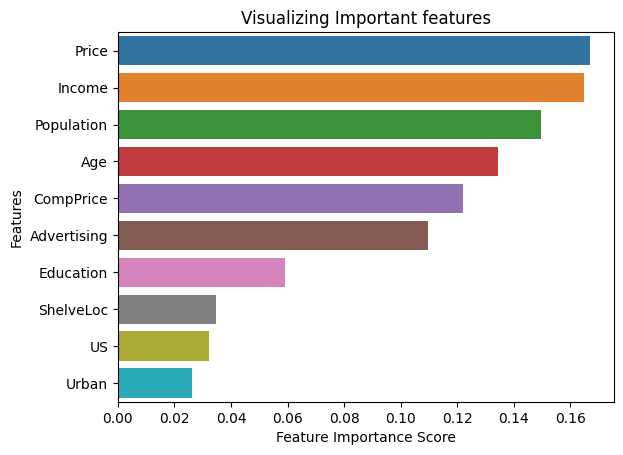

In [20]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

The above features are the best using entropy method for classification of high sales and low sales

Random Forest using Gini criteria:

In [21]:
model_gini = RandomForestClassifier(n_jobs=3,n_estimators=15,criterion='gini')

In [22]:
model_gini.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, n_jobs=3)

Checking the accuracy of the model:

In [23]:
pred=model_gini.predict(x_test)
print(f"Accuracy: {round(np.mean(pred==y_test)*100, 2)}%")

Accuracy: 76.25%


Best Features found using Gini impurity criteria:

In [24]:
feature_imp_gini = pd.Series(model_gini.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp_gini

Population     0.168191
Price          0.144740
Income         0.144274
Age            0.125260
CompPrice      0.119511
Advertising    0.098349
Education      0.085307
ShelveLoc      0.055712
Urban          0.034732
US             0.023923
dtype: float64

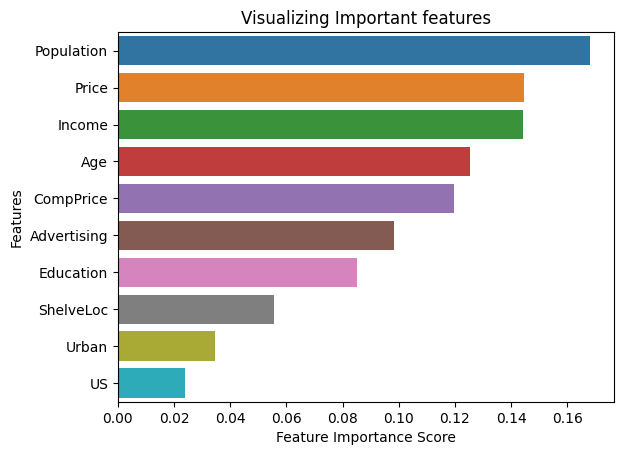

In [25]:
sns.barplot(x=feature_imp_gini, y=feature_imp_gini.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()